In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DX

/content/drive/MyDrive/DX


##### 샘플 데이터

In [ ]:
# # 코랩 konlpy 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2025-05-13 05:19:55--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2025-05-13 05:19:55--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca7515eb7912e8c724ceaa42e0.dl.dropboxusercontent.com/cd/0/inline/CplR9m4eP93PXo0GpNXBv3np4WkNUt_PlbV_BDyplixZrhVL_cWkyDKLR-wiymTzLGgqvqnMzXW3DbPNk-tzyZi4qoD9W6Mqsjarcwu6vzQo6GzU3OTTGiuadQfzy6GSnWTpC3XoAuO1wEJ4C2ZUzBhS/file?dl=1# [following]
--2025-05-13 05:19:55--  https://ucc

In [ ]:
# #kiwi
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.6 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.21.0-py3-none-any.whl size=35593192 sha256=762e2fa535e09edb7e8af7020405a5774658d51ea8331179992d11eb6be500b0
  Stored in directory: /root/.cache/pip/wheels/b0/16/3d/95053ab5298f0f0f22ffea6de0200b6f24bffb73cab4c1a828
Successfully built kiwipiepy_model


In [3]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
import glob
pkl_path = glob.glob('./Actor/*.pkl')
# pkl_path = pkl_path[5:7] # 수업예제
#pkl_path # 9, 10, 11
sleep_path = pkl_path[:]
sleep_path

['./Actor/Actor0_action.pkl',
 './Actor/Actor1_action.pkl',
 './Actor/Actor2_action.pkl',
 './Actor/Actor3_action.pkl',
 './Actor/Actor5_action.pkl',
 './Actor/Actor4_action.pkl']

In [5]:
df = pd.DataFrame()

for p in sleep_path:
  with open(p, 'rb') as f:
    new_df = pickle.load(f)
  df = pd.concat([df, new_df])

df = df.reset_index(drop=True)

In [6]:
df.head()

,source,search_words,url,title,contents,tagged_contents,vector,umap_kmeans_cluster,2nd_cluster,3rd_cluster,action_cluster
0,블로그,아기+잠깨,https://blog.naver.com/miyasmile/223095906074,NaN,D 313일아기 육아일기 오늘 울아가 8시쯤 일어났다. 8시35분 이유식 닭고기배추...,"[육아, 일기, 오늘, 아가, 이유식, 닭고기, 배추, 보리차, 오늘, 아가, 돌,...",[ 0.5749904 -1.1368233 -1.3840497 -0.952106...,1,-1,0,4
1,블로그,아기+잠깨,https://blog.naver.com/jjinius_kwon/223094800350,NaN,똥쟁이 안꾸잉 생후 232일차 23.04.25 화 요즘 왜 이렇게 잠이 안드는지 어...,"[똥, 안꾸잉, 생후, 화, 요즘, 왜, 잠, 어제, 새벽, 편이, 각자, 거, 침...",[ 0.05704629 -0.56485105 -0.04377888 -1.117852...,5,-1,0,1
2,블로그,아기+잠깨,https://blog.naver.com/midor02/223097544532,NaN,강남고양이무마취전문미용샵 블랙스완 반가워요 집사님들 냥이묭사 배원장이에옹 이번에는...,"[강남고양이, 무, 마취, 미용, 블랙스완, 집사, 냥이묭사, 배, 원장, 옹, 이...",[ 1.5659806e+00 -1.3117813e+00 9.4728261e-01 ...,1,-1,0,3
3,블로그,아기+잠깨,https://blog.naver.com/midor02/223094108327,NaN,강남고양이무마취전문미용샵 블랙스완 반가워요 집사님들 냥이묭사 배원장이에옹 이번에는...,"[강남고양이, 무, 마취, 미용, 블랙스완, 집사, 냥이묭사, 배, 원장, 옹, 이...",[ 9.7424036e-01 -1.3263056e+00 1.1708997e+00 ...,1,-1,0,3
4,블로그,아기+잠깨,https://blog.naver.com/hyezinism/223100640906,NaN,15개월 접어든 저희 아들 돌 지나고서부터 부쩍 빨리 크는 느낌에 하루하루 배우는 ...,"[개월, 저희, 아들, 돌, 지나, 고서, 부쩍, 느낌, 하루하루, 것, 줄, 것,...",[ 1.2117395 -0.7208898 -0.28993335 -0.072553...,4,-1,0,3


# ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

#### 1.1 감성사전 불러오기

In [7]:
import json

In [8]:
with open('SentiWord_info.json', encoding='utf-8-sig', mode = 'r') as f:
  sents_dicts = json.load(f)

#### 1.2 감성점수 구하는 define 함수 만들기

In [ ]:
# 예상되는 출력값 [('좋다', '2'), ('싫다', '-2')]
def sentiment_score(sents_dicts, token_list):
  result_list = []
  for token in token_list:
    for s in sents_dicts:
      if s['word'] == token:
        result = s['word'], s['polarity']
        result_list.append(result)
  return result_list

In [ ]:
# 2) word·word_root 모두 매핑하는 dict 생성
sents_map = {}
for entry in sents_dicts:
    sents_map[entry['word']] = entry['polarity']
    sents_map[entry['word_root']] = entry['polarity']

# 3) 토큰 리스트에 대해 lookup 함수 정의
def sentiment_score(token_list):
    """
    token_list 내 토큰이 sents_map에 있으면
    (토큰, polarity) 형태로 반환.
    """
    return [(tok, sents_map[tok])
            for tok in token_list
            if tok in sents_map]

In [ ]:
# 4) 테스트해 보기
tokens0 = df['tagged_contents'].iloc[0]
print(tokens0)
print(sentiment_score(tokens0))
print(sentiment_score(['좋다', '싫다', '알쏭달쏭', '검색']))

['육아', '일기', '오늘', '아가', '이유식', '닭고기', '배추', '보리차', '오늘', '아가', '돌', '촬영', '날', '날씨', '또', '비', '아들', '촬영', '사진', '아들', '두번째', '컨셉', '피노키오', '유럽', '농부', '느낌', '아들', '뭘', '사실', '오전', '촬영', '잠', '온', '행운', '첫', '시작', '시작', '오후', '다시', '찍기', '김', '시간', '예약', '차', '친정', '차', '자마자', '잠', '아들', '도착', '후', '바로', '깨', '친정', '부모님', '이유식', '먹이', '스튜디오', '중', '또', '잠', '푹', '못', '자서', '걱정', '수고', '김', '돌잔치', '때', '입', '한복', '셀렉', '진주', '엠비씨', '컴', '션', '몇개', '셀렉', '스타일', '이번', '신상', '궁', '스타일', '한복', '행운', '한복', '신상', '내', '한복', '추가', '행운', '한복', '추가', '뭔가', '계속', '추가', '느낌', '한번', '신랑', '저', '스타일', '셀렉', '퍼기', '방지', '퍼기', '캡', '배송비', '보리차', '때', '준비', '행운', '굿', '아이템', '보냉', '개', '구입', '디자인', '상큼', '이번', '여름', '사용', '오늘', '아가', '이유식', '번', '저녁', '이유식', '거의', '못', '먹음', '비', '오타', '민', '유산균', '번', '비타민', '응', '목욕', '함', '오늘', '아가', '엄마', '아빠', '행복', '호랑이', '띠', '호랑이', '띠', '호랑이', '띠', '성장', '일기', '육아', '일기', '육아', '소통', '육아', '맘', '육아', '정보', '육아용품', '육아', '소통', '육아', '템', '육아', '템', '리뷰']
[('돌',

### 1.3  감성점수 구하기

#### 1.3.1 적합하게 형태소 재분리

In [ ]:
from konlpy.tag import Okt
okt = Okt()

from kiwipiepy import Kiwi
kiwi = Kiwi()

In [ ]:
def okt_pos_tagging(string):
  string = kiwi.space(string)
  pos_words = okt.morphs(string, norm=True, stem=True)
  return pos_words

#### 1.3.2 감정점수 적용하기
* (시간소요_1000개 기준 약 1분 30초)

In [ ]:
sentiment = []
for i in tqdm(df['contents']):
  token = okt_pos_tagging(i)
  score = sentiment_score(token)
  sentiment.append(score)

100%|██████████| 52891/52891 [4:46:17<00:00,  3.08it/s]


In [ ]:
import pickle

filename_pkl = 'sentiment.pkl'

# 저장
with open(filename_pkl, 'wb') as f:
    pickle.dump(sentiment, f)

print(f"'{filename_pkl}' 파일로 리스트가 피클링되어 저장되었습니다.")

'sentiment.pkl' 파일로 리스트가 피클링되어 저장되었습니다.


In [9]:
filename_pkl = 'sentiment.pkl'

with open(filename_pkl, 'rb') as f:
    sentiment = pickle.load(f)

In [13]:
sentiment[0]

[('울', '-2'),
 ('차', '-1'),
 ('울', '-2'),
 ('돌', '-2'),
 ('날', '-1'),
 ('가', '1'),
 ('비', '-2'),
 ('울', '-2'),
 ('귀엽다', '2'),
 ('이', '2'),
 ('울', '-2'),
 ('이쁘다', '2'),
 ('이', '2'),
 ('행운', '1'),
 ('이', '2'),
 ('찡', '-1'),
 ('찡', '-1'),
 ('로', '1'),
 ('차', '-1'),
 ('태우다', '-1'),
 ('차', '-1'),
 ('타', '-2'),
 ('이', '2'),
 ('깨', '-1'),
 ('버리다', '-2'),
 ('더', '-1'),
 ('좋다', '2'),
 ('과', '-1'),
 ('놀다', '1'),
 ('로', '1'),
 ('이', '2'),
 ('못', '-1'),
 ('걱정', '-1'),
 ('이', '2'),
 ('수고', '1'),
 ('때', '-1'),
 ('개', '-2'),
 ('궁', '-2'),
 ('행운', '1'),
 ('이', '2'),
 ('내', '-1'),
 ('원', '2'),
 ('행운', '1'),
 ('이', '2'),
 ('원', '2'),
 ('번', '0'),
 ('거', '-1'),
 ('예쁘다', '2'),
 ('저', '-1'),
 ('로', '1'),
 ('흘리다', '-1'),
 ('때', '-1'),
 ('울', '-2'),
 ('행운', '1'),
 ('이', '2'),
 ('이기다', '1'),
 ('크다', '1'),
 ('거', '-1'),
 ('거', '-1'),
 ('개', '-2'),
 ('상큼', '1'),
 ('울', '-2'),
 ('번', '0'),
 ('못', '-1'),
 ('비', '-2'),
 ('번', '0'),
 ('울', '-2'),
 ('행복', '2'),
 ('고맙다', '2'),
 ('흑', '-2'),
 ('이', '2'),
 ('띠', '-2'),

### 제외할 액션들에 해당하는 감성점수 제외

In [10]:
# --- 제외할 조건 정의 ---
# 각 조건들을 boolean Series로 만듭니다.
condition1 = (df['3rd_cluster'] == 1) & (df['action_cluster'].isin([4, 5, 6, 7, 8]))
condition2 = (df['3rd_cluster'] == 2) & (df['action_cluster'] == 5)
condition3 = (df['3rd_cluster'] == 3) & (df['action_cluster'].isin([3, 4]))
condition4 = (df['3rd_cluster'] == 4) & (df['action_cluster'].isin([2, 4]))
condition5 = (df['3rd_cluster'] == 5)

In [11]:
# 모든 제외 조건을 OR 연산으로 결합합니다. (하나라도 만족하면 제외)
# 모든 제외 조건을 OR 연산으로 결합 (True면 제외 대상)
combined_exclusion_condition = condition1 | condition2 | condition3 | condition4 | condition5

print("\n--- 제외 조건 (True면 제외) ---")


--- 제외 조건 (True면 제외) ---


In [15]:
sentiment2 = [] # 새로운 감성 점수를 담을 리스트
exclusion_flags = combined_exclusion_condition.values

if len(sentiment) != len(exclusion_flags):
    raise ValueError("Original sentiment list and exclusion flags do not have the same length.")

print("\n--- sentiment2 생성 중 ---")
print("인덱스 | 원본 점수 | 제외 여부 | sentiment2에 추가 여부")
print("----------------------------------------------------")
for i in range(len(sentiment)):
    # exclusion_flags[i]가 True이면 제외, False이면 포함
    if not exclusion_flags[i]:
            sentiment2.append(sentiment[i]) # sentiment2에는 원래의 전체 튜플 (단어, (점수, 레이블)) 저장
            try:
                score_to_print = sentiment[i][1][0]
                print(f"{i:^7} | {score_to_print:^10} | {str(exclusion_flags[i]):^10} | O")
            except (IndexError, TypeError) as e:
                print(f"Error processing item at index {i}: {sentiment[i]}. Error: {e}. Skipping print.")
    else:
        try:
            score_to_print = sentiment[i][1][0]
            print(f"{i:^7} | {score_to_print:^10} | {str(exclusion_flags[i]):^10} | X")
        except (IndexError, TypeError) as e:
            print(f"Error processing excluded item at index {i}: {sentiment[i]}. Error: {e}. Skipping print.")

Output hidden; open in https://colab.research.google.com to view.

In [16]:
print(f"원본 sentiment 리스트 (길이: {len(sentiment)}):")
print(f"\n생성된 sentiment2 (길이: {len(sentiment2)}):")

원본 sentiment 리스트 (길이: 52891):

생성된 sentiment2 (길이: 44028):


In [17]:
df_excluded_rows = df[combined_exclusion_condition]
df2 = df[~combined_exclusion_condition]

print(f"\n제외된 행 개수: {len(df_excluded_rows)}")
print(f"유지된 행 개수 (sentiment2 항목 수와 동일해야 함): {len(df2)}")
assert len(df2) == len(sentiment2), "유지된 DataFrame 행 수와 sentiment2 길이가 일치하지 않습니다."


제외된 행 개수: 8863
유지된 행 개수 (sentiment2 항목 수와 동일해야 함): 44028


In [18]:
with open('sentiment2.pkl', 'wb') as f:
        pickle.dump(sentiment2, f)
print("\n'sentiment2.pkl' 파일이 성공적으로 저장되었습니다.")


'sentiment2.pkl' 파일이 성공적으로 저장되었습니다.


In [19]:
df2.to_csv('final_data_excluded_0514.csv', encoding='utf-8-sig')

In [20]:
sentiment2[0]

[('울', '-2'),
 ('차', '-1'),
 ('울', '-2'),
 ('돌', '-2'),
 ('날', '-1'),
 ('가', '1'),
 ('비', '-2'),
 ('울', '-2'),
 ('귀엽다', '2'),
 ('이', '2'),
 ('울', '-2'),
 ('이쁘다', '2'),
 ('이', '2'),
 ('행운', '1'),
 ('이', '2'),
 ('찡', '-1'),
 ('찡', '-1'),
 ('로', '1'),
 ('차', '-1'),
 ('태우다', '-1'),
 ('차', '-1'),
 ('타', '-2'),
 ('이', '2'),
 ('깨', '-1'),
 ('버리다', '-2'),
 ('더', '-1'),
 ('좋다', '2'),
 ('과', '-1'),
 ('놀다', '1'),
 ('로', '1'),
 ('이', '2'),
 ('못', '-1'),
 ('걱정', '-1'),
 ('이', '2'),
 ('수고', '1'),
 ('때', '-1'),
 ('개', '-2'),
 ('궁', '-2'),
 ('행운', '1'),
 ('이', '2'),
 ('내', '-1'),
 ('원', '2'),
 ('행운', '1'),
 ('이', '2'),
 ('원', '2'),
 ('번', '0'),
 ('거', '-1'),
 ('예쁘다', '2'),
 ('저', '-1'),
 ('로', '1'),
 ('흘리다', '-1'),
 ('때', '-1'),
 ('울', '-2'),
 ('행운', '1'),
 ('이', '2'),
 ('이기다', '1'),
 ('크다', '1'),
 ('거', '-1'),
 ('거', '-1'),
 ('개', '-2'),
 ('상큼', '1'),
 ('울', '-2'),
 ('번', '0'),
 ('못', '-1'),
 ('비', '-2'),
 ('번', '0'),
 ('울', '-2'),
 ('행복', '2'),
 ('고맙다', '2'),
 ('흑', '-2'),
 ('이', '2'),
 ('띠', '-2'),

In [21]:
sum( [ int(i[1]) for i in sentiment2[0]] )

-9

In [22]:
# 감성점수 더하기
sum_list = []
for s in sentiment2:
  s_score = sum( [ int(i[1]) for i in s] )
  sum_list.append(s_score)

In [23]:
df2['sentiment_score'] = sum_list
df2.head(3)

<ipython-input-23-4f8fdb807f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment_score'] = sum_list


,source,search_words,url,title,contents,tagged_contents,vector,umap_kmeans_cluster,2nd_cluster,3rd_cluster,action_cluster,sentiment_score
0,블로그,아기+잠깨,https://blog.naver.com/miyasmile/223095906074,NaN,D 313일아기 육아일기 오늘 울아가 8시쯤 일어났다. 8시35분 이유식 닭고기배추...,"[육아, 일기, 오늘, 아가, 이유식, 닭고기, 배추, 보리차, 오늘, 아가, 돌,...",[ 0.5749904 -1.1368233 -1.3840497 -0.952106...,1,-1,0,4,-9
1,블로그,아기+잠깨,https://blog.naver.com/jjinius_kwon/223094800350,NaN,똥쟁이 안꾸잉 생후 232일차 23.04.25 화 요즘 왜 이렇게 잠이 안드는지 어...,"[똥, 안꾸잉, 생후, 화, 요즘, 왜, 잠, 어제, 새벽, 편이, 각자, 거, 침...",[ 0.05704629 -0.56485105 -0.04377888 -1.117852...,5,-1,0,1,26
2,블로그,아기+잠깨,https://blog.naver.com/midor02/223097544532,NaN,강남고양이무마취전문미용샵 블랙스완 반가워요 집사님들 냥이묭사 배원장이에옹 이번에는...,"[강남고양이, 무, 마취, 미용, 블랙스완, 집사, 냥이묭사, 배, 원장, 옹, 이...",[ 1.5659806e+00 -1.3117813e+00 9.4728261e-01 ...,1,-1,0,3,61


### 1.4 전체 액터와 액션에 대해서 감성점수 평균값 계산
*감성점수는 액션별로 계산

#### 1.4.1 dict 형식으로 출력
>[예시 출력 화면]
- key(액터 액션이름) / value(평균점수)
-{'Actor1_Action1': 0.703,
- 'Actor1_Action2': 0.649,
- 'Actor0_Action1': -0.276,
- 'Actor0_Action2': -0.178}

In [24]:
action_sents = dict()

for actor in df2['3rd_cluster'].unique(): # 액터 데이터프레임 필터링
  actor_df = df2[df2['3rd_cluster'] == actor]

  for action in actor_df['action_cluster'].unique(): # 필터링한 액터에 액션이 몇개 있는지 필터링하기 위해 unique 적용
    action_df = actor_df[actor_df['action_cluster'] == action] # 액션 필터링
    action_score = np.mean(action_df['sentiment_score']) # 평균
    action_sents[f'Actor{actor}_Action{action}'] = action_score # 딕셔너리 추가

In [25]:
action_sents

{'Actor0_Action4': np.float64(36.73529411764706),
 'Actor0_Action1': np.float64(29.875486381322958),
 'Actor0_Action3': np.float64(39.68199233716475),
 'Actor0_Action2': np.float64(32.418502202643175),
 'Actor1_Action2': np.float64(34.63651050080775),
 'Actor1_Action1': np.float64(31.15412695193673),
 'Actor1_Action3': np.float64(25.654255319148938),
 'Actor2_Action1': np.float64(20.213620774130327),
 'Actor2_Action4': np.float64(30.39763779527559),
 'Actor2_Action2': np.float64(43.66216216216216),
 'Actor2_Action3': np.float64(26.236292428198432),
 'Actor3_Action1': np.float64(34.312958435207825),
 'Actor3_Action2': np.float64(19.752260397830018),
 'Actor4_Action3': np.float64(-5.7955010224948875),
 'Actor4_Action1': np.float64(9.57073597737526)}

#### 1.4.2 정규화 (-10~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
data = action_sents.values()
data = np.array(list(data)).reshape(-1, 1)
data[:5]

array([[36.73529412],
       [29.87548638],
       [39.68199234],
       [32.4185022 ],
       [34.6365105 ]])

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# scaler = RobustScaler() # 스케일러 선언

# transformed_data = scaler.fit_transform(data) # fitting(데이터 적용)
# transformed_data[:5]

array([[ 0.46634576],
       [-0.04364796],
       [ 0.68541861],
       [ 0.14541304],
       [ 0.31031129]])

In [28]:
minmax = MinMaxScaler(feature_range = (-10, 10))
transformed_data = minmax.fit_transform(data)

In [29]:
score_result = transformed_data.flatten().tolist()
score_result = [round(i, 4) for i in score_result]
score_result

[7.1989,
 4.4249,
 8.3905,
 5.4532,
 6.3502,
 4.9419,
 2.7178,
 0.5177,
 4.636,
 10.0,
 2.9532,
 6.2193,
 0.3312,
 -10.0,
 -3.7861]

In [30]:
for key, new_value in zip(action_sents.keys(), score_result):
  action_sents[key] = new_value
action_sents

{'Actor0_Action4': 7.1989,
 'Actor0_Action1': 4.4249,
 'Actor0_Action3': 8.3905,
 'Actor0_Action2': 5.4532,
 'Actor1_Action2': 6.3502,
 'Actor1_Action1': 4.9419,
 'Actor1_Action3': 2.7178,
 'Actor2_Action1': 0.5177,
 'Actor2_Action4': 4.636,
 'Actor2_Action2': 10.0,
 'Actor2_Action3': 2.9532,
 'Actor3_Action1': 6.2193,
 'Actor3_Action2': 0.3312,
 'Actor4_Action3': -10.0,
 'Actor4_Action1': -3.7861}

In [31]:
sents_df = pd.DataFrame(action_sents.items(), columns=['Action', 'Satisfaction'])
sents_df.head()

,Action,Satisfaction
0,Actor0_Action4,7.1989
1,Actor0_Action1,4.4249
2,Actor0_Action3,8.3905
3,Actor0_Action2,5.4532
4,Actor1_Action2,6.3502


# ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [32]:
from collections import Counter

In [33]:
check = []
for actor, action in zip(df2['3rd_cluster'], df2['action_cluster']):
  check.append(f'Actor{actor}_Action{action}')

In [34]:
frequency = Counter(check)
frequency

Counter({'Actor0_Action4': 238,
         'Actor0_Action1': 257,
         'Actor0_Action3': 261,
         'Actor0_Action2': 227,
         'Actor1_Action2': 619,
         'Actor1_Action1': 4931,
         'Actor1_Action3': 188,
         'Actor2_Action1': 2041,
         'Actor2_Action4': 508,
         'Actor2_Action2': 962,
         'Actor2_Action3': 766,
         'Actor3_Action1': 15542,
         'Actor3_Action2': 1659,
         'Actor4_Action3': 978,
         'Actor4_Action1': 14851})

In [35]:
# 확률로 변환
importance_dict = dict()

# 전체합
total_count = sum(frequency.values())

# 확률로 변환
for item, value in frequency.items():
  importance = (value/total_count) * 100
  importance_dict[item] = importance

In [36]:
importance_dict

{'Actor0_Action4': 0.5405650949395839,
 'Actor0_Action1': 0.5837194512582902,
 'Actor0_Action3': 0.5928045789043336,
 'Actor0_Action2': 0.5155809939129644,
 'Actor1_Action2': 1.4059235032252202,
 'Actor1_Action1': 11.199691105660033,
 'Actor1_Action3': 0.427000999364041,
 'Actor2_Action1': 4.635686381393659,
 'Actor2_Action4': 1.1538112110475154,
 'Actor2_Action2': 2.184973198873444,
 'Actor2_Action3': 1.7398019442173163,
 'Actor3_Action1': 35.300263468701736,
 'Actor3_Action2': 3.768056691196511,
 'Actor4_Action3': 2.221313709457618,
 'Actor4_Action1': 33.730807667847735}

### 2-2. Importance 점수 정규화(0~10)

In [37]:
data = importance_dict.values()

data = np.array(list(data)).reshape(-1,1)

In [ ]:
# scaler = RobustScaler()
# transformed_data = scaler.fit_transform(data)
# transformed_data

array([[-2.44059088e-02],
       [ 0.00000000e+00],
       [ 5.13808606e-03],
       [-3.85356455e-02],
       [ 4.64996789e-01],
       [ 6.00385356e+00],
       [-1.66987797e-01],
       [-1.77263969e-01],
       [-2.14515093e-01],
       [-1.87540141e-01],
       [-2.18368658e-01],
       [-8.86319846e-02],
       [ 2.29158638e+00],
       [ 1.88824663e-01],
       [ 3.22414900e-01],
       [ 9.05587669e-01],
       [ 6.53821452e-01],
       [ 1.96339114e+01],
       [ 1.80089917e+00],
       [-3.10854207e-01],
       [-3.26268465e-01],
       [ 3.69942197e-01],
       [-2.82594733e-01],
       [ 6.92357097e-01],
       [ 3.21130379e-02],
       [-2.41490045e-01],
       [ 5.59537572e+00],
       [-1.74694926e-01],
       [-2.59473346e-01],
       [-2.53050739e-01],
       [-1.41297367e-01],
       [ 9.26140013e-01],
       [ 1.87463070e+01],
       [ 1.15350032e+00],
       [-2.95439949e-01]])

In [38]:
minmax = MinMaxScaler(feature_range = (-10, 10))
transformed_data = minmax.fit_transform(data)

In [39]:
score_result = transformed_data.flatten().tolist()
score_result = [round(i, 4) for i in score_result]
score_result

[-9.9349,
 -9.9101,
 -9.9049,
 -9.9492,
 -9.4386,
 -3.8218,
 -10.0,
 -7.5863,
 -9.5832,
 -8.9918,
 -9.2471,
 10.0,
 -8.0839,
 -8.971,
 9.0999]

In [40]:
for key, new_value in zip(importance_dict.keys(), score_result):
  importance_dict[key] = new_value
importance_dict

{'Actor0_Action4': -9.9349,
 'Actor0_Action1': -9.9101,
 'Actor0_Action3': -9.9049,
 'Actor0_Action2': -9.9492,
 'Actor1_Action2': -9.4386,
 'Actor1_Action1': -3.8218,
 'Actor1_Action3': -10.0,
 'Actor2_Action1': -7.5863,
 'Actor2_Action4': -9.5832,
 'Actor2_Action2': -8.9918,
 'Actor2_Action3': -9.2471,
 'Actor3_Action1': 10.0,
 'Actor3_Action2': -8.0839,
 'Actor4_Action3': -8.971,
 'Actor4_Action1': 9.0999}

In [41]:
sents_df['Importance'] = importance_dict.values()
sents_df

,Action,Satisfaction,Importance
0,Actor0_Action4,7.1989,-9.9349
1,Actor0_Action1,4.4249,-9.9101
2,Actor0_Action3,8.3905,-9.9049
3,Actor0_Action2,5.4532,-9.9492
4,Actor1_Action2,6.3502,-9.4386
5,Actor1_Action1,4.9419,-3.8218
6,Actor1_Action3,2.7178,-10.0000
7,Actor2_Action1,0.5177,-7.5863
8,Actor2_Action4,4.6360,-9.5832
9,Actor2_Action2,10.0000,-8.9918


# ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [42]:
def opportunity_score(satisfaction, importance):
  result = importance + max(importance - satisfaction, 0)
  return result

In [43]:
opportunity_list = []

for s, i in zip(sents_df['Satisfaction'], sents_df['Importance']):
  score_result = opportunity_score(s, i)
  opportunity_list.append(score_result)

sents_df['opportunity_score'] = opportunity_list # 기회점수 데이터프레임에 추가
sents_df

,Action,Satisfaction,Importance,opportunity_score
0,Actor0_Action4,7.1989,-9.9349,-9.9349
1,Actor0_Action1,4.4249,-9.9101,-9.9101
2,Actor0_Action3,8.3905,-9.9049,-9.9049
3,Actor0_Action2,5.4532,-9.9492,-9.9492
4,Actor1_Action2,6.3502,-9.4386,-9.4386
5,Actor1_Action1,4.9419,-3.8218,-3.8218
6,Actor1_Action3,2.7178,-10.0000,-10.0000
7,Actor2_Action1,0.5177,-7.5863,-7.5863
8,Actor2_Action4,4.6360,-9.5832,-9.5832
9,Actor2_Action2,10.0000,-8.9918,-8.9918


### 3.2 Opportunity area

In [44]:
sents_df.to_csv('opportunity_score_excluded_0514.csv', encoding='utf-8-sig')

In [45]:
import matplotlib.pyplot as plt

In [46]:
!pip install matplotlib adjustText

In [47]:
from adjustText import adjust_text

In [50]:
# 데이터 세팅(액션명리스트_범례와 레이블 / 액션 수만큼의 컬러맵 / 중요도 리스트 / 만족도 리스트)
actions = sents_df['Action']
colors = np.random.rand(len(actions), 3) # rgb컬러 0~1 실수값 3개의 값의 조합
importance = sents_df['Importance']
satisfaction = sents_df['Satisfaction']

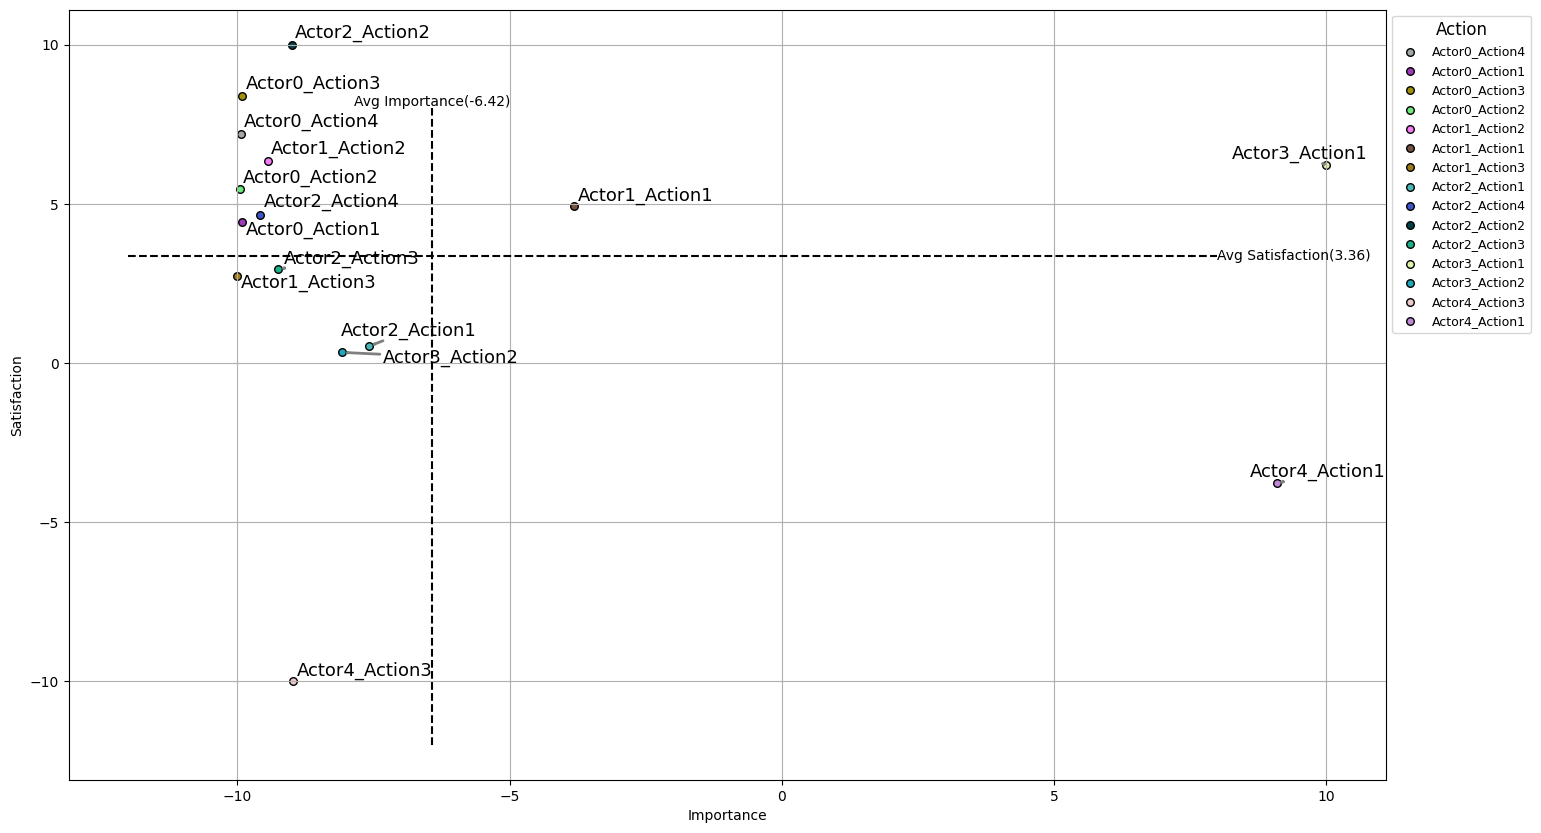

In [49]:
plt.figure(figsize = (17, 10)) # 크기

# 점찍기
for i , action in enumerate(actions):
  plt.scatter(importance[i], satisfaction[i], c = [colors[i]], label = action, s = 30, edgecolors='black')
  # s = 점의 사이즈

# 범례
plt.legend(title='Action', fontsize = 9, title_fontsize = 12, loc = 'best', bbox_to_anchor = (1,1))

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

if len(importance) > 0:
    x_min_plot = importance.min() - (importance.max() - importance.min())*0.1
    x_max_plot = importance.max() - (importance.max() - importance.min())*0.1
else:
    x_min_plot, x_max_plot = -5, 5

if len(satisfaction) > 0:
    y_min_plot = satisfaction.min() - (satisfaction.max() - satisfaction.min())*0.1
    y_max_plot = satisfaction.max() - (satisfaction.max() - satisfaction.min())*0.1
else:
    y_min_plot, y_max_plot = -5, 5

if len(satisfaction) >0:
    satisfaction_mean = satisfaction.mean()
    plt.plot([x_min_plot, x_max_plot], [satisfaction_mean, satisfaction_mean], 'k--', label=f'Avg Satisfaction({satisfaction_mean:.2f})')
    plt.text(x_max_plot, satisfaction_mean, f'Avg Satisfaction({satisfaction_mean:.2f})', ha='left', va='center')

if len(importance) > 0:
    importance_mean = importance.mean()
    plt.plot([importance_mean, importance_mean], [y_min_plot, y_max_plot], 'k--', label=f'Avg Importance({satisfaction_mean:.2f})')
    plt.text(importance_mean, y_max_plot, f'Avg Importance({importance_mean:.2f})', ha='center', va='bottom')

# 텍스트 추가
texts = []
for i, action in enumerate(actions):
  texts.append(plt.text(importance[i], satisfaction[i], action, fontsize=13))

# 겹치지 않도록 텍스트 조정
adjust_text(texts, arrowprops = dict(arrowstyle='->', color = 'grey', lw=2))

# 격자
plt.grid(True)
plt.savefig('opportunity_area_excluded_0514.png')
plt.show()

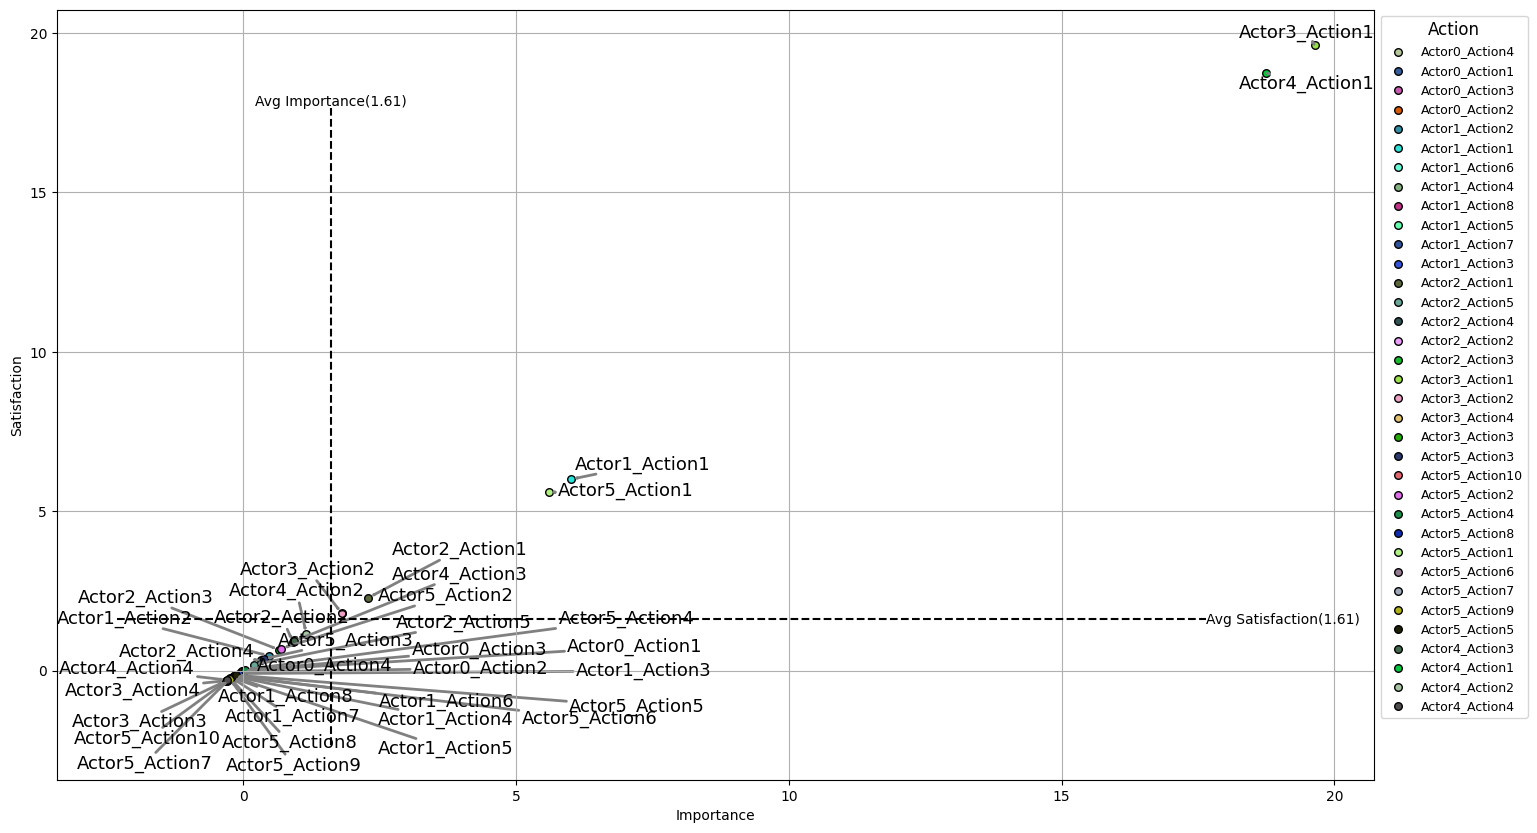

In [ ]:
plt.figure(figsize = (17, 10)) # 크기

# 점찍기
for i , action in enumerate(actions):
  plt.scatter(importance[i], satisfaction[i], c = [colors[i]], label = action, s = 30, edgecolors='black')
  # s = 점의 사이즈

# 범례
plt.legend(title='Action', fontsize = 9, title_fontsize = 12, loc = 'best', bbox_to_anchor = (1,1))

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

if len(importance) > 0:
    x_min_plot = importance.min() - (importance.max() - importance.min())*0.1
    x_max_plot = importance.max() - (importance.max() - importance.min())*0.1
else:
    x_min_plot, x_max_plot = -5, 5

if len(satisfaction) > 0:
    y_min_plot = satisfaction.min() - (satisfaction.max() - satisfaction.min())*0.1
    y_max_plot = satisfaction.max() - (satisfaction.max() - satisfaction.min())*0.1
else:
    y_min_plot, y_max_plot = -5, 5

if len(satisfaction) >0:
    satisfaction_mean = satisfaction.mean()
    plt.plot([x_min_plot, x_max_plot], [satisfaction_mean, satisfaction_mean], 'k--', label=f'Avg Satisfaction({satisfaction_mean:.2f})')
    plt.text(x_max_plot, satisfaction_mean, f'Avg Satisfaction({satisfaction_mean:.2f})', ha='left', va='center')

if len(importance) > 0:
    importance_mean = importance.mean()
    plt.plot([importance_mean, importance_mean], [y_min_plot, y_max_plot], 'k--', label=f'Avg Importance({satisfaction_mean:.2f})')
    plt.text(importance_mean, y_max_plot, f'Avg Importance({importance_mean:.2f})', ha='center', va='bottom')


# 텍스트 추가
texts = []
for i, action in enumerate(actions):
  texts.append(plt.text(importance[i], satisfaction[i], action, fontsize=13))

# 겹치지 않도록 텍스트 조정
adjust_text(texts, arrowprops = dict(arrowstyle='->', color = 'grey', lw=2))

# 격자
plt.grid(True)
plt.savefig('opportunity_area_robust_0513.png')
plt.show()

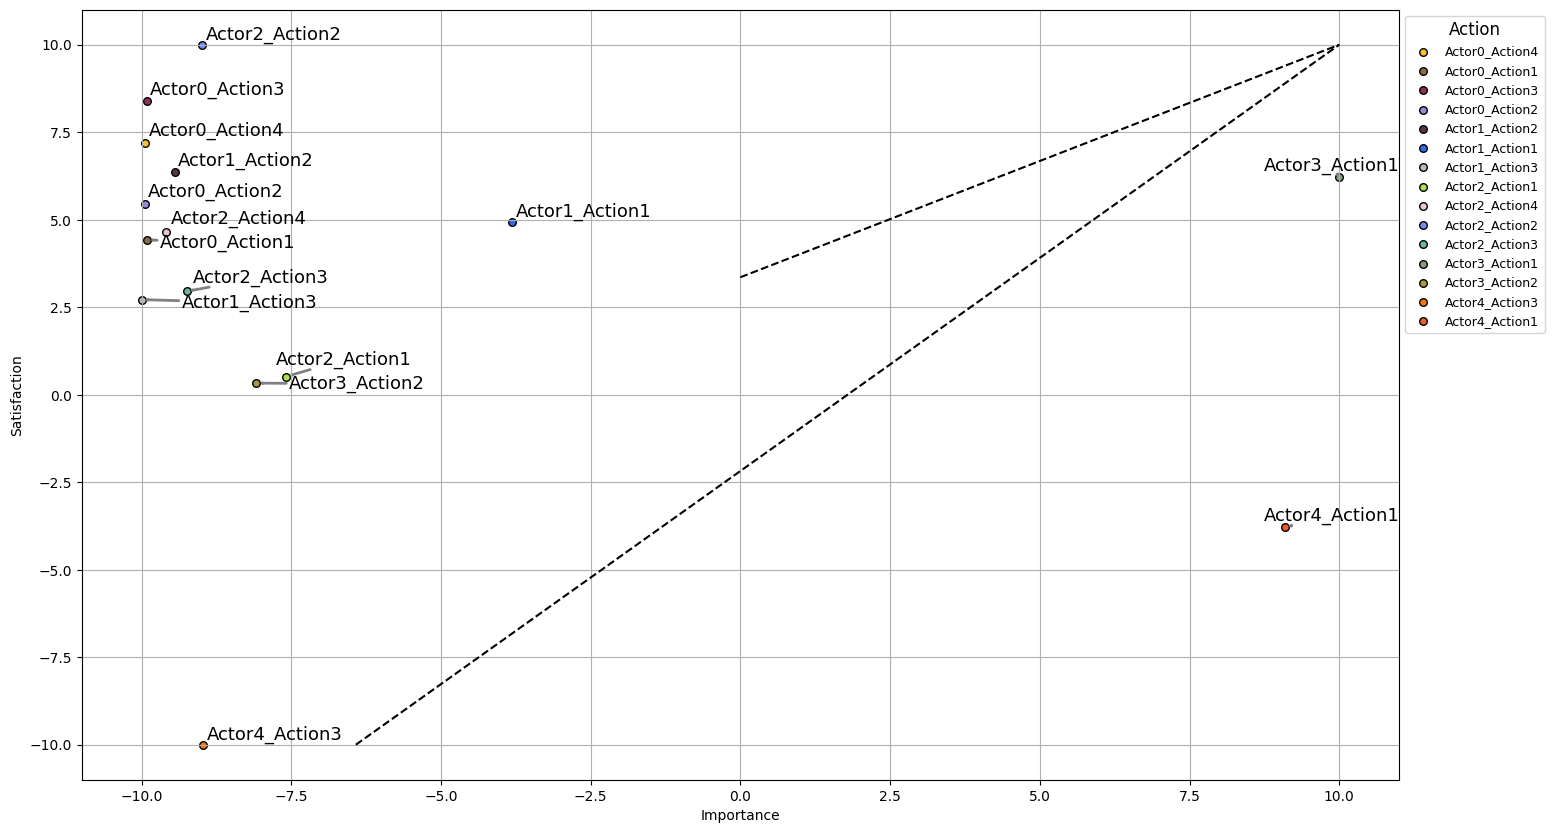

In [52]:
plt.figure(figsize = (17, 10)) # 크기

# 점찍기
for i , action in enumerate(actions):
  plt.scatter(importance[i], satisfaction[i], c = [colors[i]], label = action, s = 30, edgecolors='black')
  # s = 점의 사이즈

# 범례
plt.legend(title='Action', fontsize = 9, title_fontsize = 12, loc = 'best', bbox_to_anchor = (1,1))

plt.xlabel('Importance')
plt.ylabel('Satisfaction')

# 만족도 기준선
xdata = [0,10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k--')
# b -> 파란색 / y - 노란색 / r - 빨간색 / g - 초록색
# - : 실선 / -- : 점선 / : : 도트

# 중요도 기준선
xdata = [importance.mean(), 10]
ydata = [-10, 10]
plt.plot(xdata, ydata, 'k--')

# 텍스트 추가
texts = []
for i, action in enumerate(actions):
  texts.append(plt.text(importance[i], satisfaction[i], action, fontsize=13))

# 겹치지 않도록 텍스트 조정
adjust_text(texts, arrowprops = dict(arrowstyle='->', color = 'grey', lw=2))

# 격자
plt.grid(True)
plt.savefig('opportunity_area_excluded_0514.png')
plt.show()